In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import k_diffusion as K 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [42]:
dataset = K.datasets.ShardedTensorDataset("/shared/amyxlu/data/cath/shards/seqlen_256/")
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, num_workers=4)

In [43]:
batch = next(iter(dataloader))

In [44]:
latent_scaler = K.normalization.LatentScaler(
    mode="channel_minmaxnorm",
)

In [45]:
raw = batch[0].float().numpy()
normalized = latent_scaler.scale(raw)
print(raw.shape, normalized.shape)

(128, 256, 1024) (128, 256, 1024)


# Downprojecting the channel dimension
### Unnormalized

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out = pca.fit_transform(raw.reshape(-1, raw.shape[-1]))

(128, 256)
(32768,)


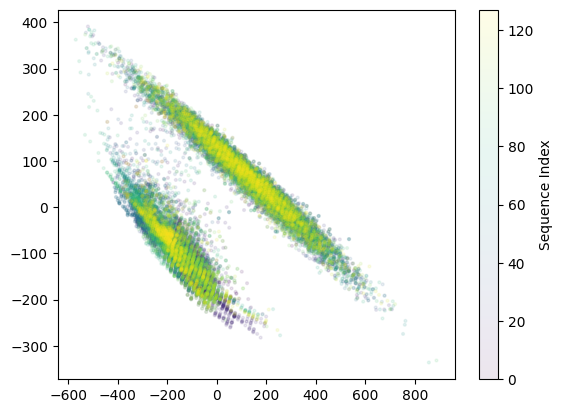

In [47]:
carr = np.broadcast_to(np.arange(raw.shape[0])[:, None], raw.shape[:2])
print(carr.shape)
carr = carr.reshape(-1)
print(carr.shape)

plt.scatter(out[:, 0], out[:, 1], alpha=0.1, s=4, c=carr)
cbar = plt.colorbar()
cbar.set_label("Sequence Index")

(128, 256)
(32768,)


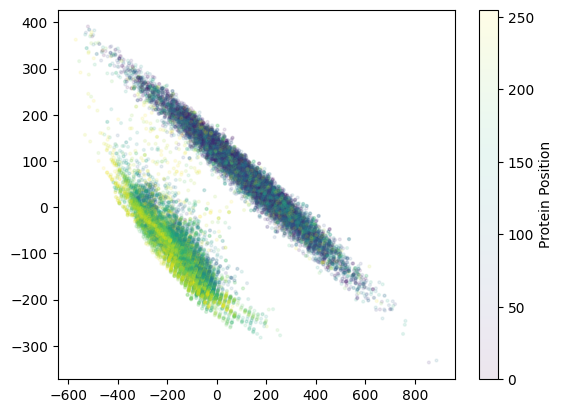

In [48]:
carr = np.broadcast_to(np.arange(raw.shape[1])[None, :], raw.shape[:2])
print(carr.shape)
carr = carr.reshape(-1)
print(carr.shape)

plt.scatter(out[:, 0], out[:, 1], alpha=0.1, s=4, c=carr)
cbar = plt.colorbar()
cbar.set_label("Protein Position")

### Normalized

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out = pca.fit_transform(normalized.reshape(-1, normalized.shape[-1]))

(128, 256)
(32768,)


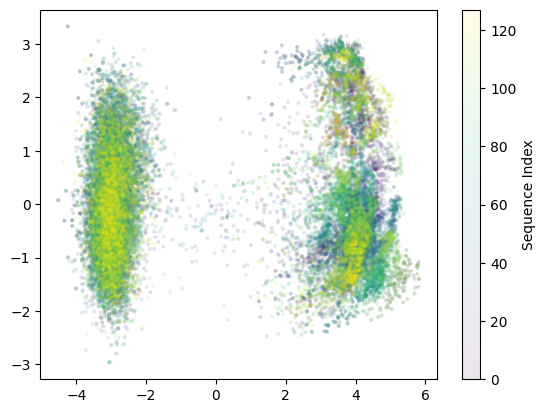

In [50]:
carr = np.broadcast_to(np.arange(normalized.shape[0])[:, None], normalized.shape[:2])
print(carr.shape)
carr = carr.reshape(-1)
print(carr.shape)

plt.scatter(out[:, 0], out[:, 1], alpha=0.1, s=4, c=carr)
cbar = plt.colorbar()
cbar.set_label("Sequence Index")

(128, 256)
(32768,)


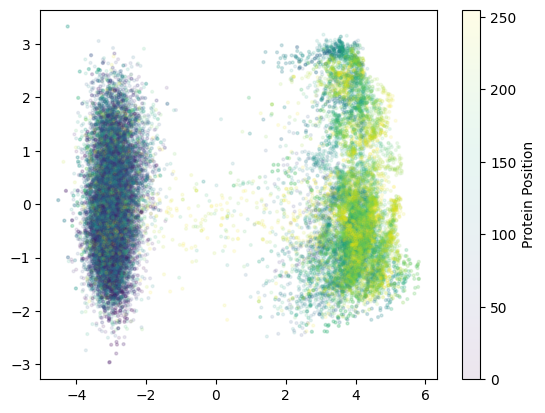

In [51]:
carr = np.broadcast_to(np.arange(normalized.shape[1])[None, :], normalized.shape[:2])
print(carr.shape)
carr = carr.reshape(-1)
print(carr.shape)

plt.scatter(out[:, 0], out[:, 1], alpha=0.1, s=4, c=carr)
cbar = plt.colorbar()
cbar.set_label("Protein Position")

# Downprojecting the Channel Dimension

In [58]:
raw.reshape(-1, raw.shape[-1]).T.shape

(1024, 32768)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out = pca.fit_transform(raw.reshape(-1, raw.shape[-1]).T)

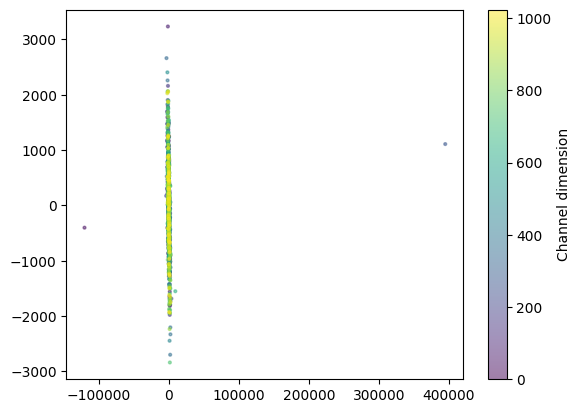

In [65]:
plt.scatter(out[:, 0], out[:, 1], alpha=0.5, s=4, c=np.arange(raw.shape[-1]))
cbar = plt.colorbar()
cbar.set_label("Channel dimension")

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out = pca.fit_transform(normalized.reshape(-1, normalized.shape[-1]).T)

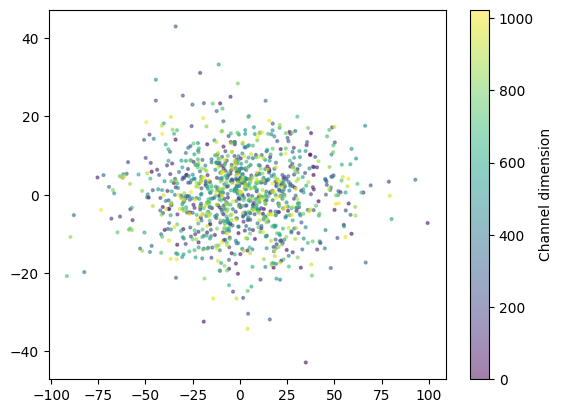

In [67]:
plt.scatter(out[:, 0], out[:, 1], alpha=0.5, s=4, c=np.arange(normalized.shape[-1]))
cbar = plt.colorbar()
cbar.set_label("Channel dimension")

In [68]:
normalized.std()

0.21952759

In [69]:
normalized.mean()

0.0004867031